In [1]:
import pandas as pd
from simulation_para import square_length, bandwidth
from _utils import plot_cdf_pdf, compare_models, compare_cdfs_ks, compare_cdfs_emd, compare_cdfs_moments, calculate_area_throughput, calculate_and_rank_percentiles

In [2]:
# load data from csv files
algo_name = "SAC"
optim_name = "SGD"
results_dir = 'results'
results_folder = f'{algo_name}-{optim_name}'

## Spectral Efficiencies

In [3]:
MODEL_DELTA_SE_SEs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SEs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SEs.csv', index_col=0)
MODEL_LOG_DELTA_SE_SEs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SEs.csv', index_col=0)
MODEL_RELATIVE_SE_SEs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SEs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SEs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SEs.csv', index_col=0)
MODEL_DELTA_SINR_SEs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SEs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SEs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SEs.csv', index_col=0)
MODEL_RELATIVE_SINR_SEs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SEs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SEs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SEs.csv', index_col=0)

MAXMIN_SEs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SEs.csv', index_col=0)
MAXPROD_SEs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SEs.csv', index_col=0)
SUMRATE_SEs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SEs.csv', index_col=0)

In [4]:
SE_DATA_R_SE = {
    'MODEL_DELTA_SE_SEs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_SEs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_SEs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_SEs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_SEs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_SEs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_SEs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_SEs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_SEs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_SEs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_SEs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_SEs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SEs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SEs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SEs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SEs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SEs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SEs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

SE_DATA_R_SINR = {
    'MODEL_DELTA_SINR_SEs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_SEs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SEs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_SEs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_SEs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_SEs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_SEs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_SEs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SEs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_SEs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SEs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_SEs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SEs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SEs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SEs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SEs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SEs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SEs,                        'color': 'black', '  linestyle': ':',  'linewidth': 1},
}

### Spectral Efficiencies

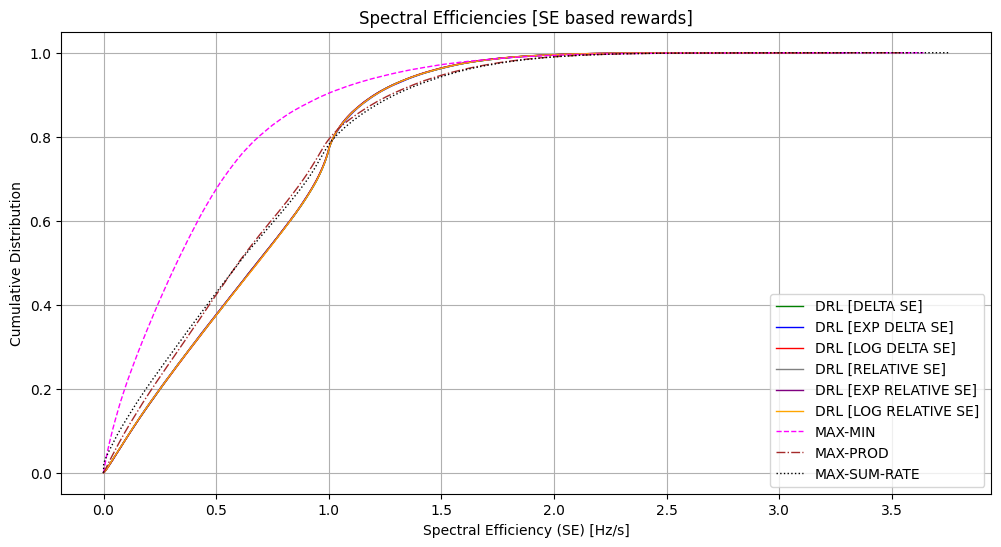

In [12]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=True)

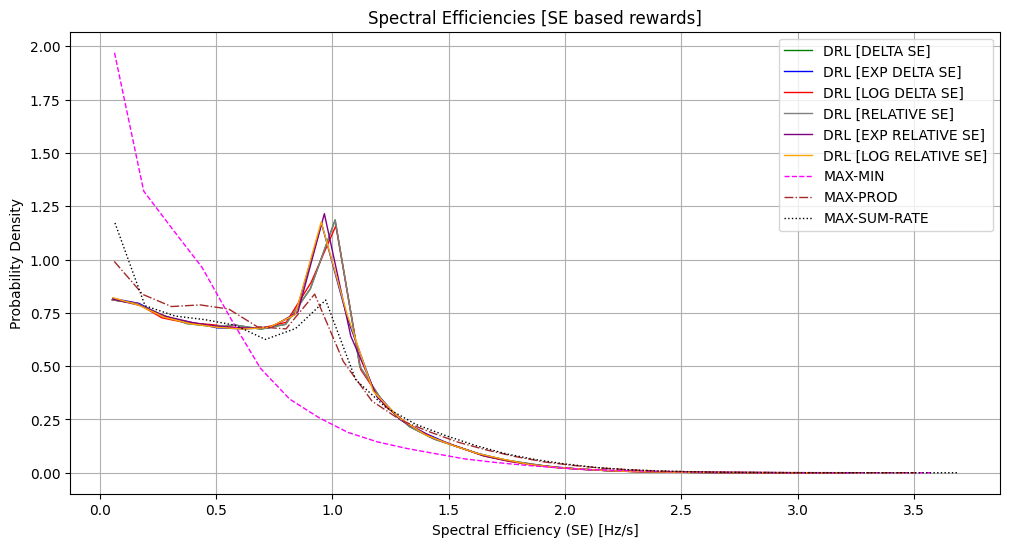

In [13]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=False)

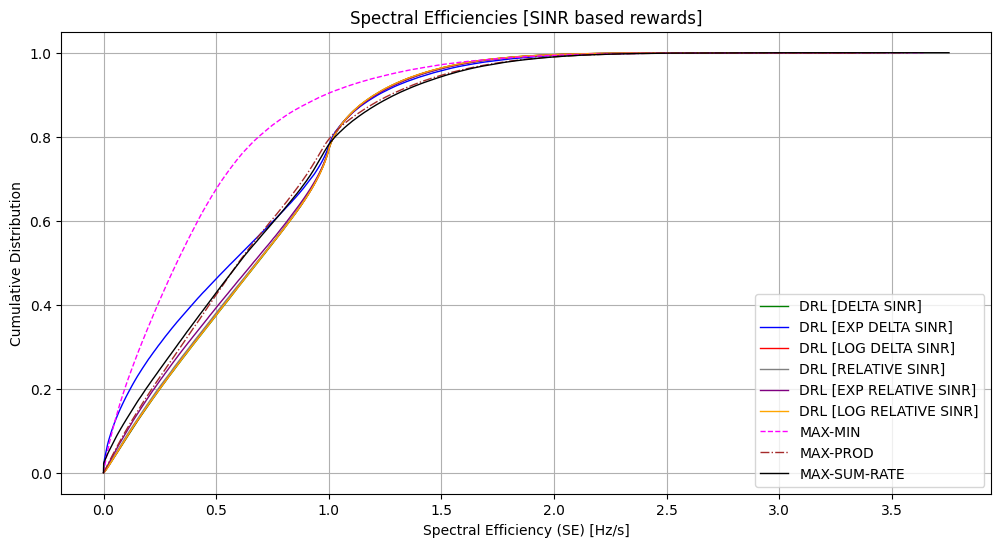

In [14]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=True)

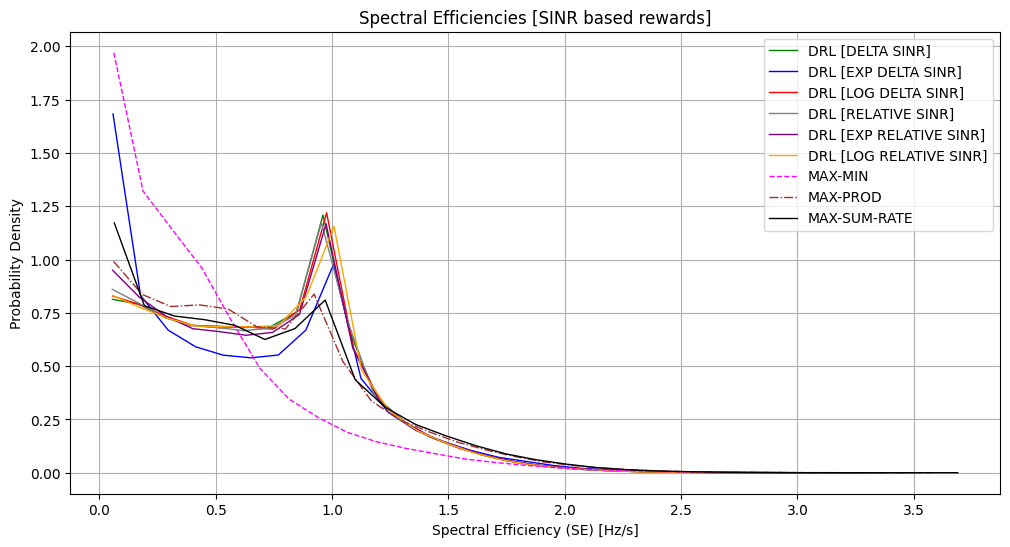

In [15]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=False)

### Mean Spectral Efficiencies

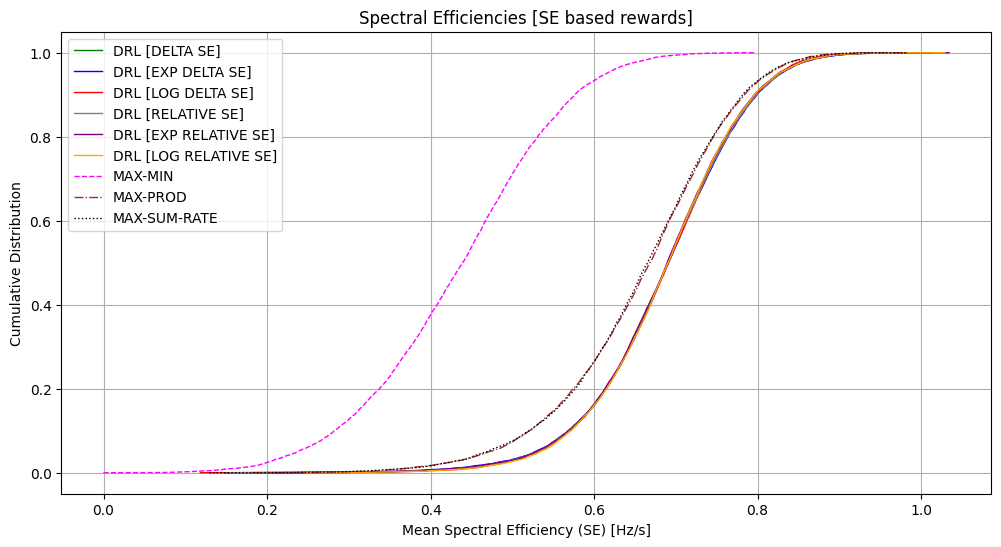

In [16]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=True)

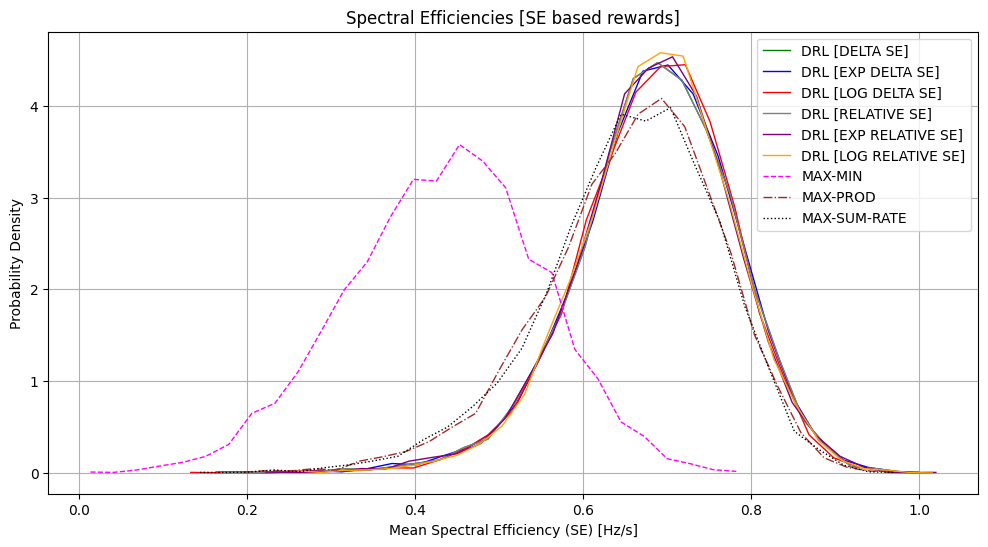

In [17]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=False)

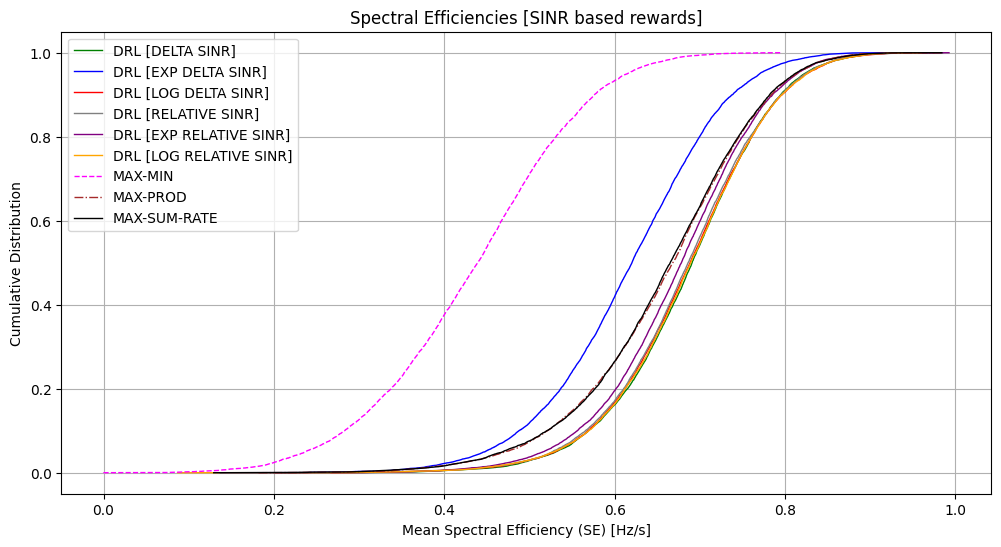

In [18]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=True)

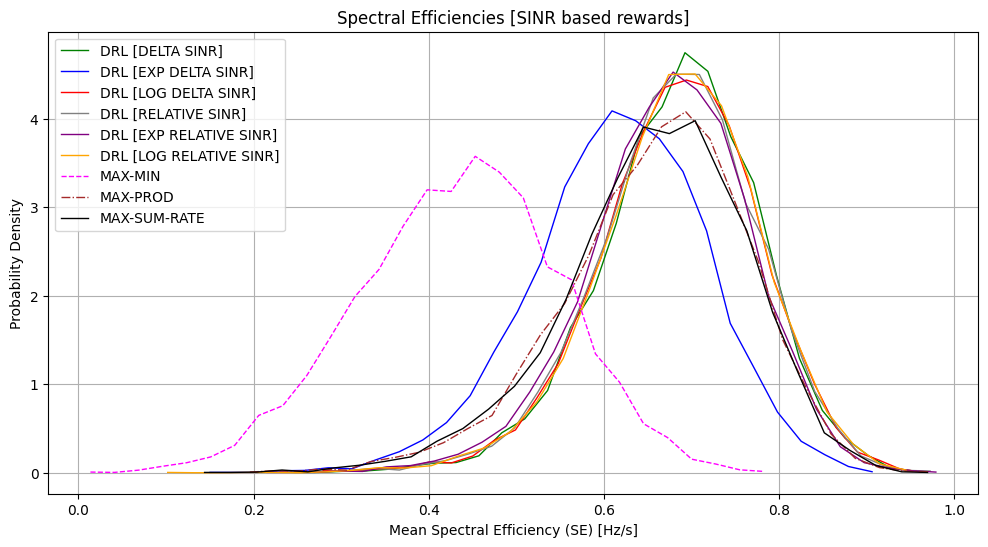

In [19]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=False)

### Geometric Mean Spectral Efficiencies

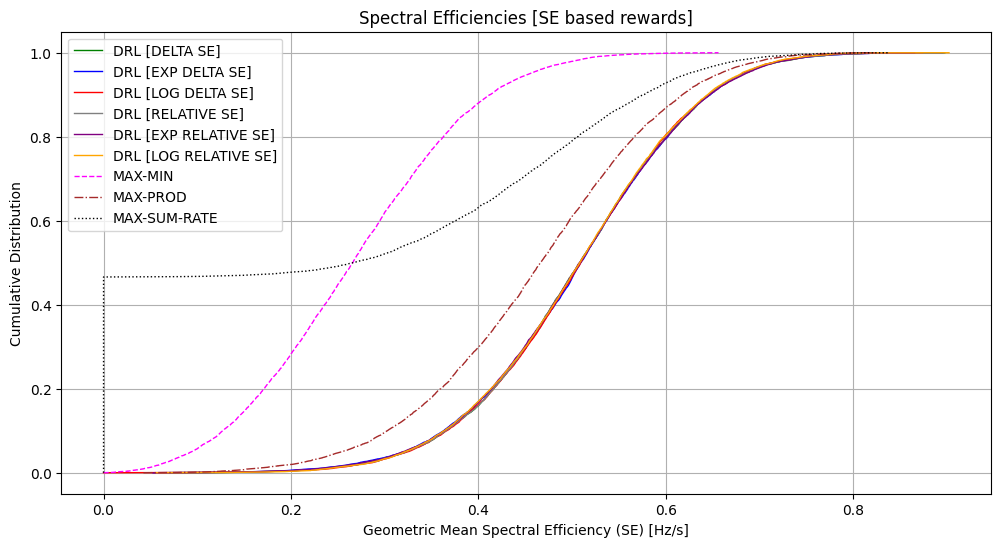

In [20]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Geometric Mean Spectral Efficiency (SE) [Hz/s]', operation='gmean', cumulative=True)

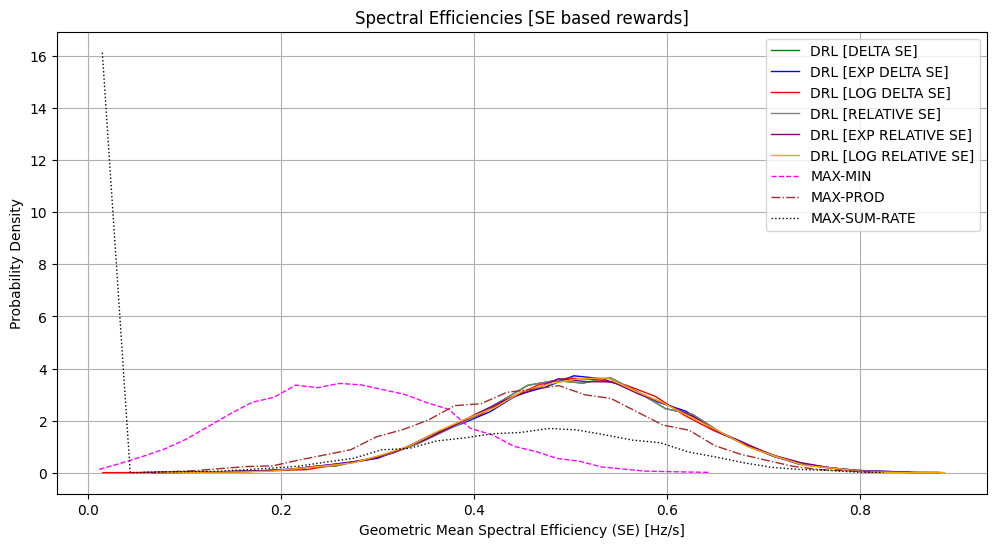

In [21]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Geometric Mean Spectral Efficiency (SE) [Hz/s]', operation='gmean', cumulative=False)

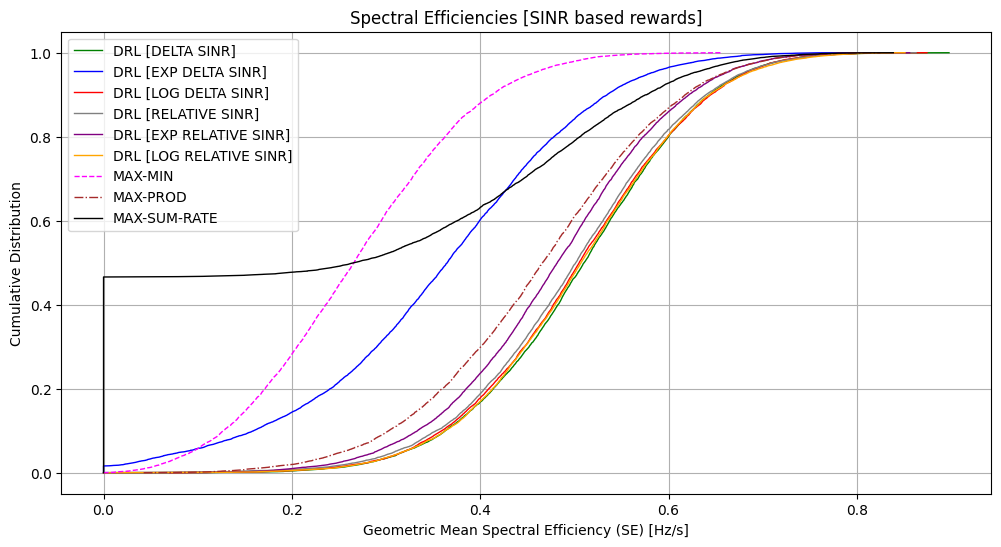

In [22]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Geometric Mean Spectral Efficiency (SE) [Hz/s]', operation='gmean', cumulative=True)

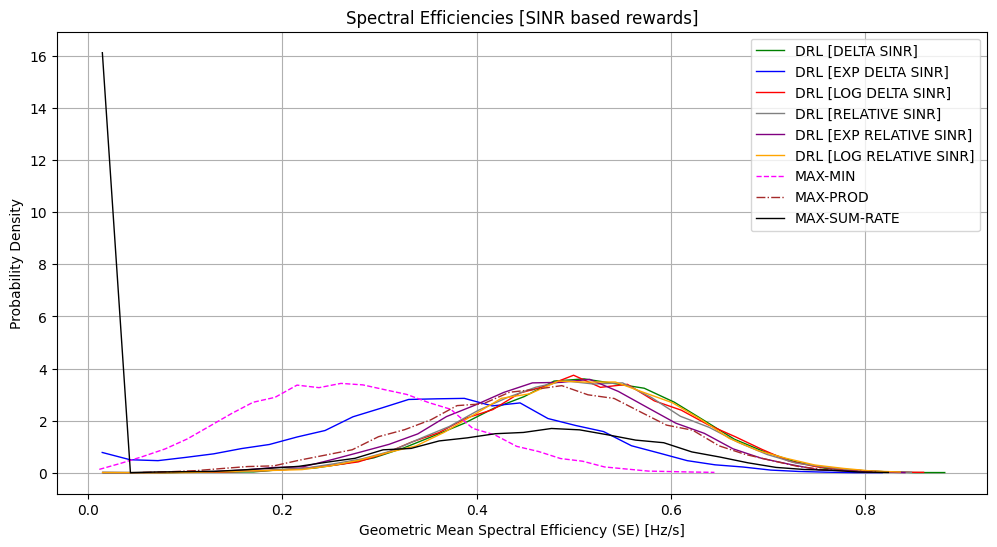

In [23]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Geometric Mean Spectral Efficiency (SE) [Hz/s]', operation='gmean', cumulative=False)

### Min Spectral Efficiencies

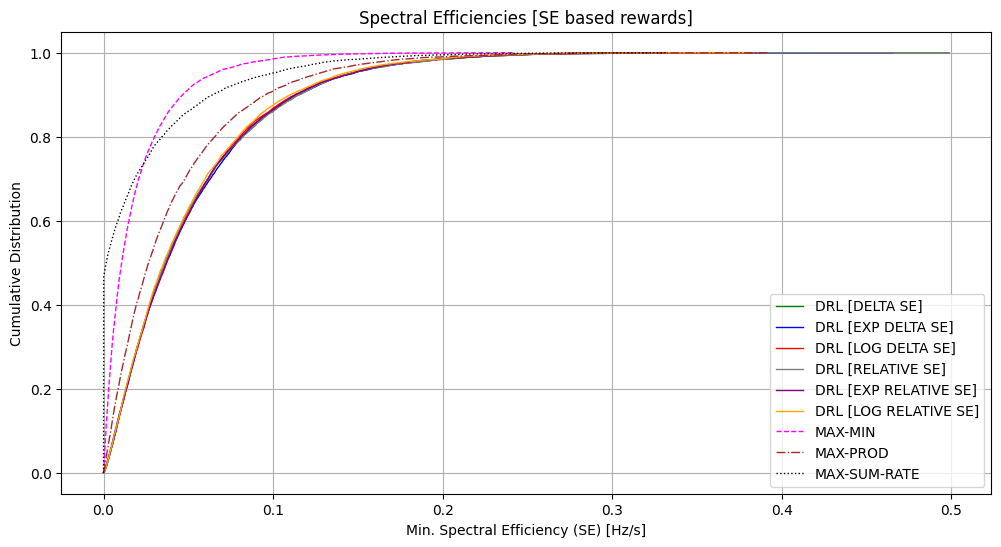

In [24]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=True)

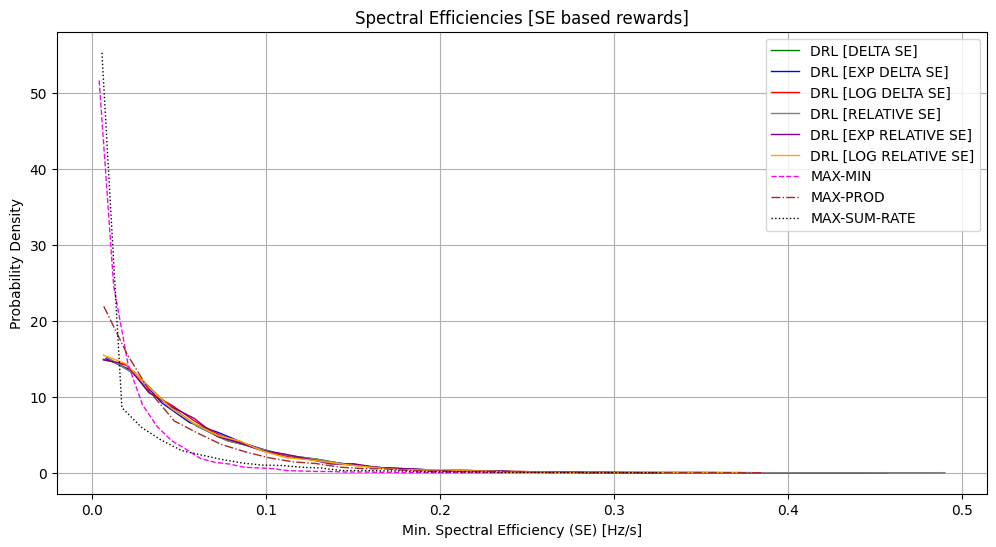

In [25]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=False)

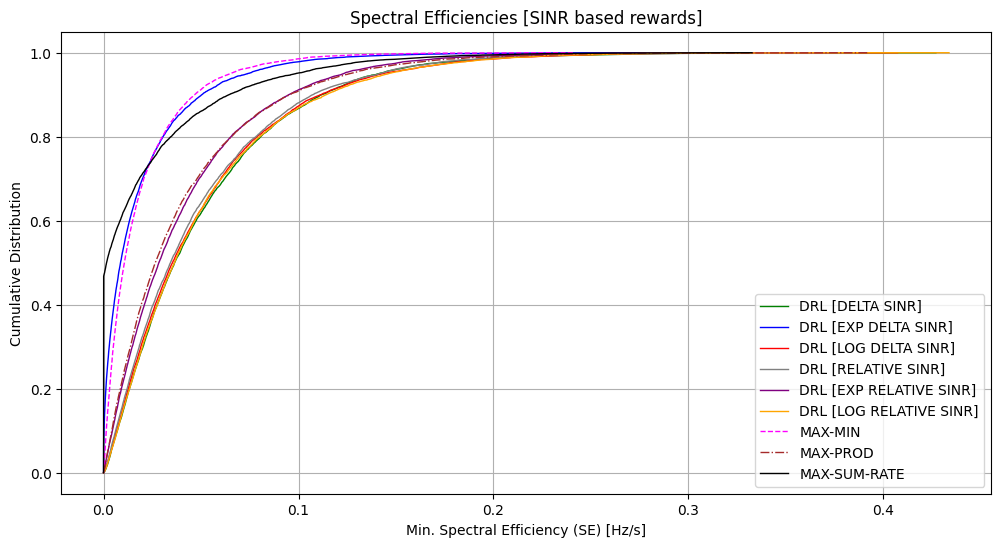

In [26]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=True)

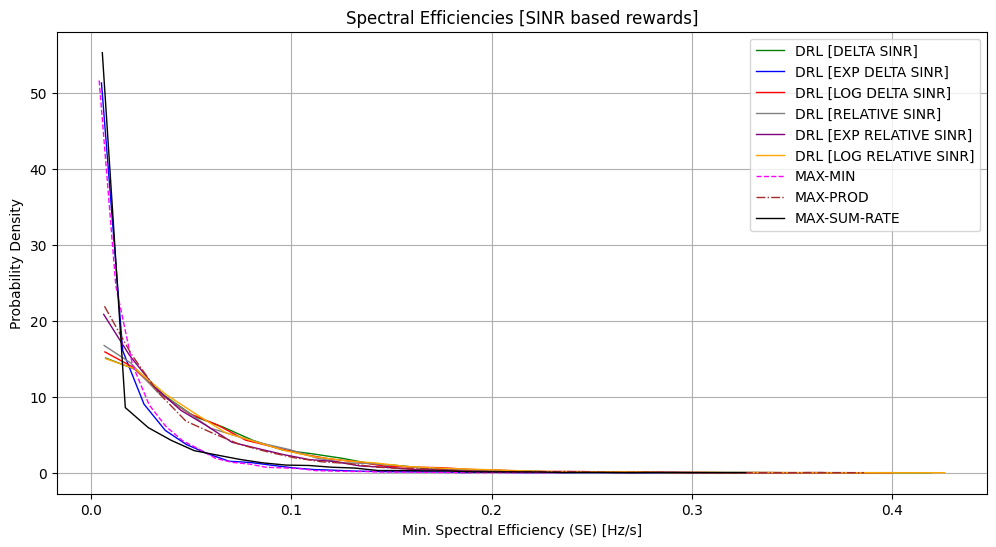

In [27]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=False)

### Max Spectral Efficiencies

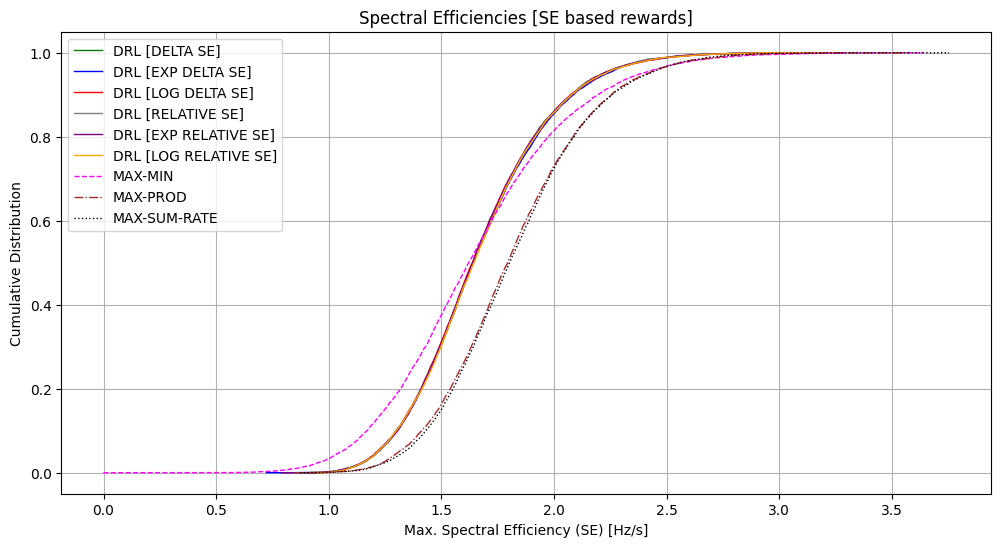

In [28]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=True)

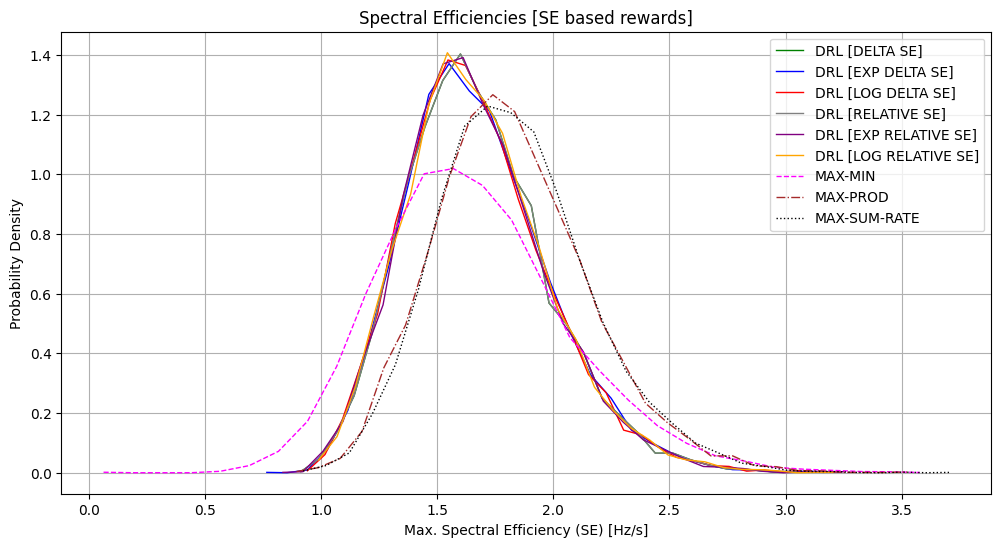

In [29]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=False)

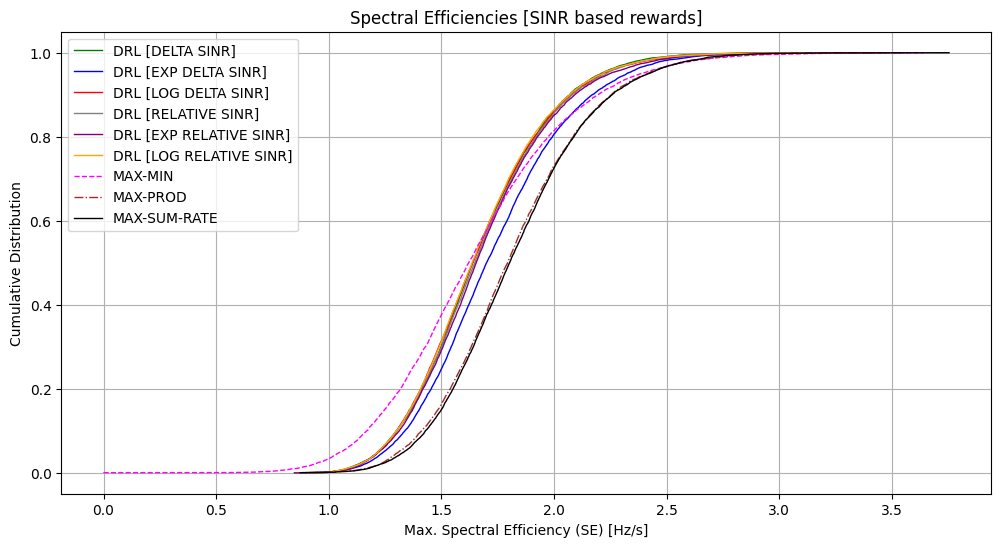

In [30]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=True)

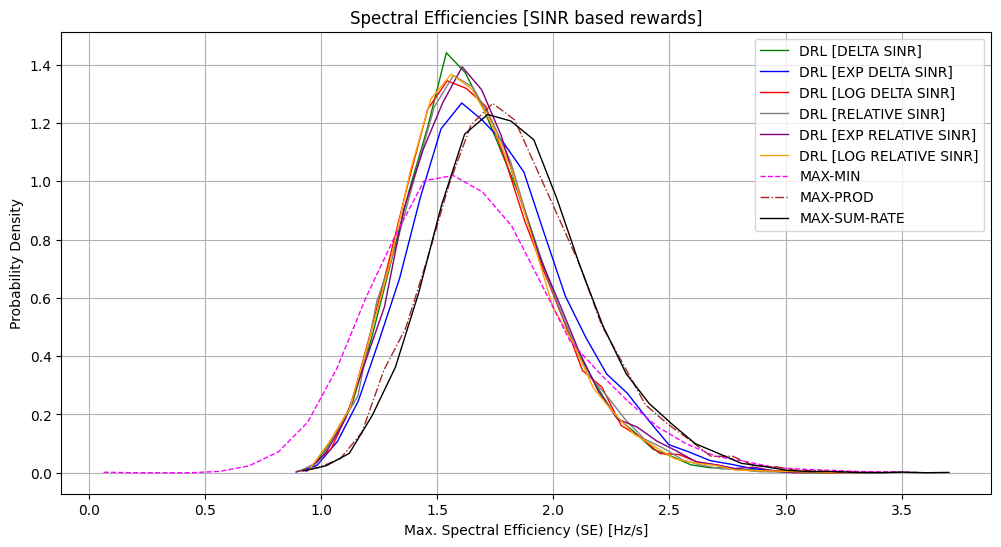

In [31]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=False)

## Sum Spectral Efficiencies

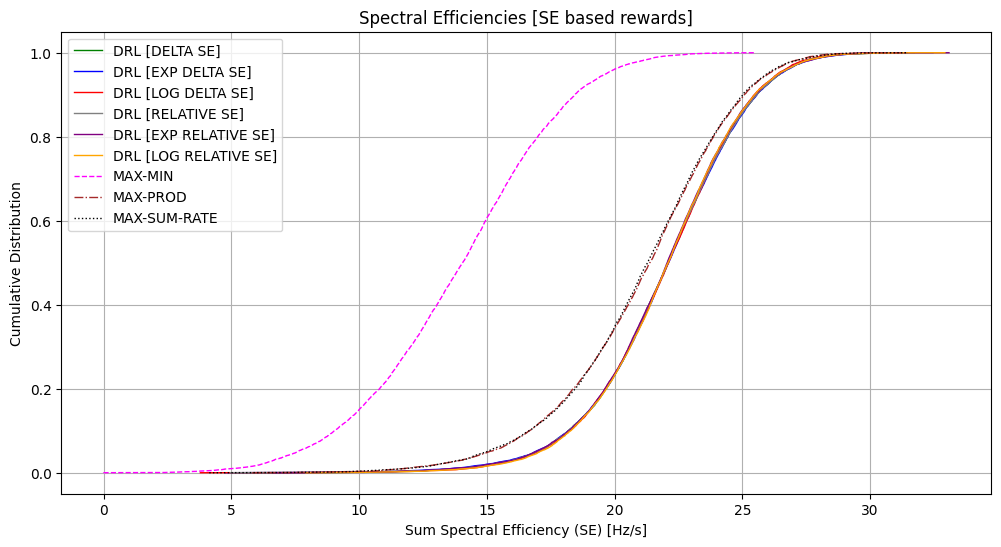

In [32]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=True)

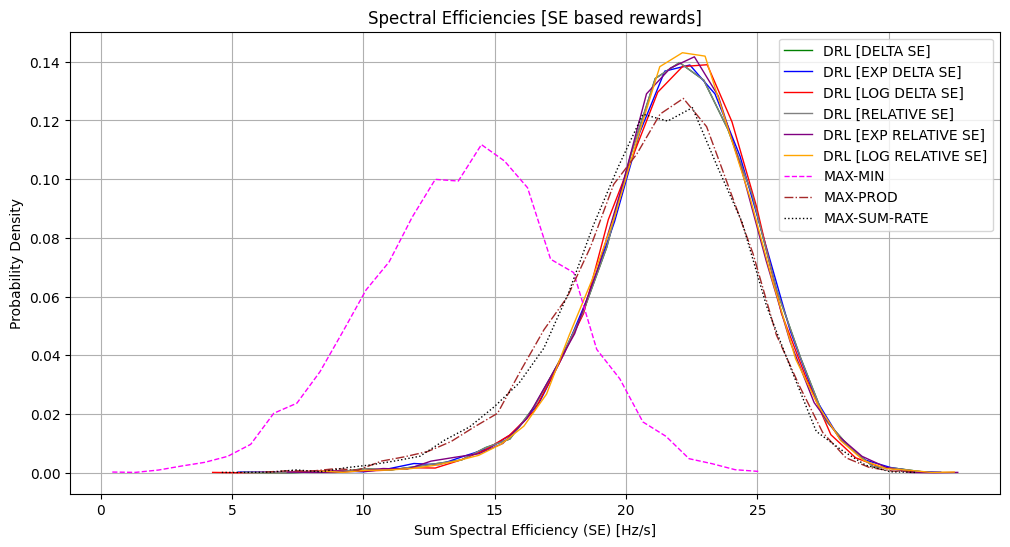

In [33]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=False)

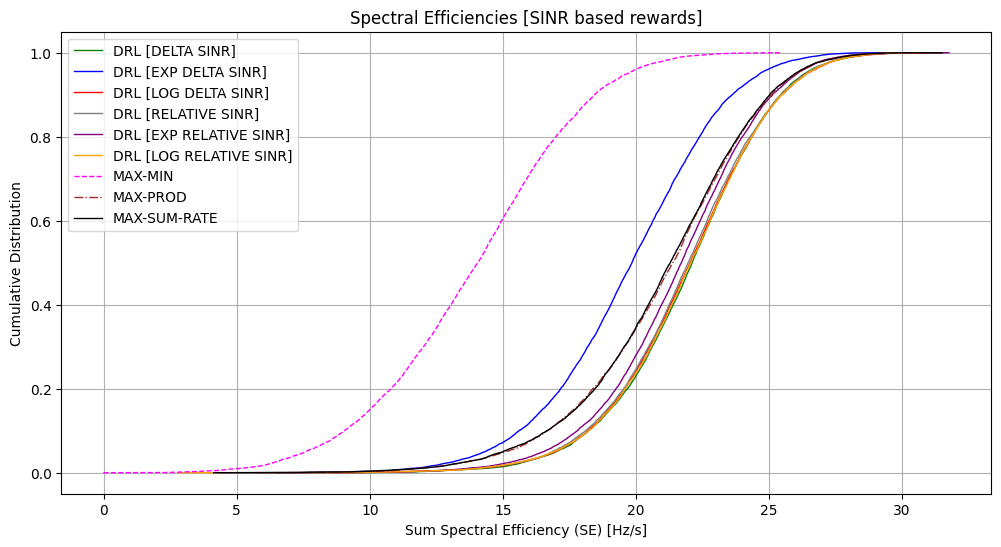

In [34]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=True)

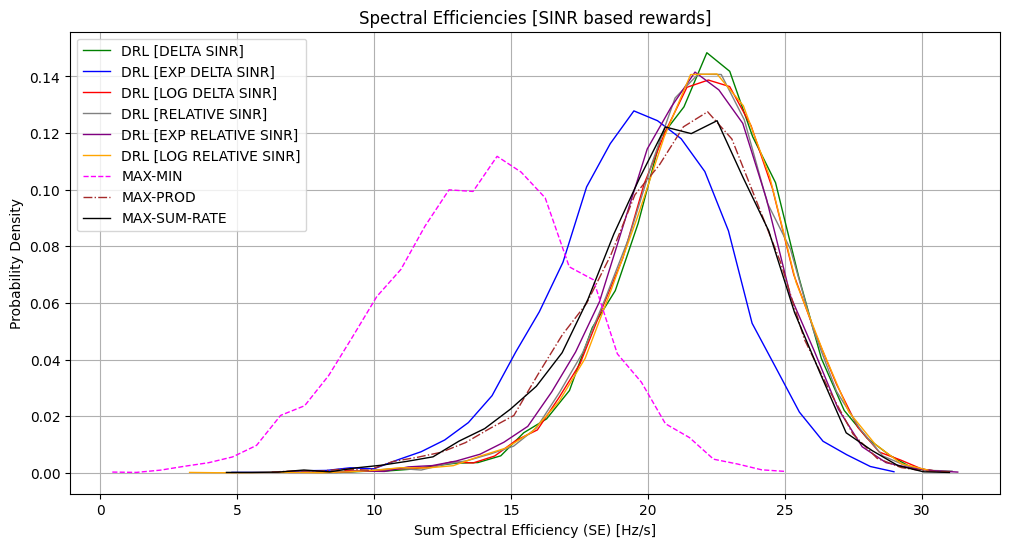

In [35]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=False)

### CDF Comparison

#### SE based reward

In [36]:
compare_models(SE_DATA_R_SE, operation=None)

,Label,Average SE,Max SE,Standard Deviation,25th Percentile,50th Percentile,75th Percentile,Geometric Mean
MODEL_DELTA_SE_SEs,DRL [DELTA SE],0.685972,3.087872,0.429664,0.320075,0.681944,0.989463,0.493518
MODEL_EXP_DELTA_CLIP_SE_SEs,DRL [EXP DELTA SE],0.686155,3.25177,0.431118,0.319422,0.68269,0.989571,0.492738
MODEL_LOG_DELTA_SE_SEs,DRL [LOG DELTA SE],0.685932,3.097591,0.428937,0.32169,0.684376,0.988668,0.0
MODEL_RELATIVE_SE_SEs,DRL [RELATIVE SE],0.685972,3.087872,0.429664,0.320075,0.681944,0.989463,0.493518
MODEL_EXP_RELATIVE_CLIP_SE_SEs,DRL [EXP RELATIVE SE],0.68482,3.293269,0.428986,0.31976,0.681802,0.988483,0.492485
MODEL_LOG_RELATIVE_SE_SEs,DRL [LOG RELATIVE SE],0.686156,3.246499,0.430156,0.320359,0.684729,0.989437,0.492562
MAXMIN_SEs,MAX-MIN,0.433573,3.640987,0.410045,0.127517,0.325092,0.600203,0.0
MAXPROD_SEs,MAX-PROD,0.658278,3.570834,0.464147,0.278405,0.598934,0.948577,0.444055
SUMRATE_SEs,MAX-SUM-RATE,0.657153,3.753867,0.479985,0.255046,0.601243,0.965235,0.0


In [37]:
ks_results_r_se = compare_cdfs_ks(SE_DATA_R_SE, operation=None)

In [38]:
ks_results_r_se['Best Model']

,Criteria,Best Model
0,KS Statistic,DRL [DELTA SE]
1,P-Value,DRL [LOG RELATIVE SE]
2,Area Between CDFs,DRL [RELATIVE SE]


In [39]:
ks_results_r_se['Details']

,Model1,Model2,KS Statistic,P-Value,Area Between CDFs
0,DRL [DELTA SE],DRL [EXP DELTA SE],0.002516,2.629219e-01,0.001386
1,DRL [DELTA SE],DRL [LOG DELTA SE],0.002331,3.489142e-01,0.001116
2,DRL [DELTA SE],DRL [RELATIVE SE],0.000000,1.000000e+00,0.000000
3,DRL [DELTA SE],DRL [EXP RELATIVE SE],0.002222,4.078614e-01,0.001233
4,DRL [DELTA SE],DRL [LOG RELATIVE SE],0.002247,3.938827e-01,0.000954
5,DRL [DELTA SE],MAX-MIN,0.306444,0.000000e+00,0.254510
6,DRL [DELTA SE],MAX-PROD,0.059063,0.000000e+00,0.056365
7,DRL [DELTA SE],MAX-SUM-RATE,0.055378,0.000000e+00,0.064953
8,DRL [EXP DELTA SE],DRL [LOG DELTA SE],0.002972,1.182097e-01,0.002024
9,DRL [EXP DELTA SE],DRL [RELATIVE SE],0.002516,2.629219e-01,0.001385


In [40]:
emd_results_r_se = compare_cdfs_emd(SE_DATA_R_SE, operation=None)

In [41]:
emd_results_r_se['Ranked Models']

,Model,Average EMD
0,DRL [DELTA SE],0.047565
1,DRL [RELATIVE SE],0.047565
2,DRL [EXP RELATIVE SE],0.047662
3,DRL [EXP DELTA SE],0.047674
4,DRL [LOG RELATIVE SE],0.047744
5,DRL [LOG DELTA SE],0.047945
6,MAX-PROD,0.072413
7,MAX-SUM-RATE,0.078761
8,MAX-MIN,0.246849


In [42]:
emd_results_r_se['Details']

,Model1,Model2,EMD Value
0,DRL [DELTA SE],DRL [EXP DELTA SE],0.001386
1,DRL [DELTA SE],DRL [LOG DELTA SE],0.001116
2,DRL [DELTA SE],DRL [RELATIVE SE],0.000000
3,DRL [DELTA SE],DRL [EXP RELATIVE SE],0.001234
4,DRL [DELTA SE],DRL [LOG RELATIVE SE],0.000954
5,DRL [DELTA SE],MAX-MIN,0.254511
6,DRL [DELTA SE],MAX-PROD,0.056366
7,DRL [DELTA SE],MAX-SUM-RATE,0.064954
8,DRL [EXP DELTA SE],DRL [LOG DELTA SE],0.002025
9,DRL [EXP DELTA SE],DRL [RELATIVE SE],0.001386


In [43]:
moments_r_se = compare_cdfs_moments(SE_DATA_R_SE, operation=None, criteria='kurtosis')

In [44]:
moments_r_se['Ranked Models']

,Model,Rank
0,MODEL_DELTA_SE_SEs,1
3,MODEL_RELATIVE_SE_SEs,2
5,MODEL_LOG_RELATIVE_SE_SEs,3
4,MODEL_EXP_RELATIVE_CLIP_SE_SEs,4
2,MODEL_LOG_DELTA_SE_SEs,5
1,MODEL_EXP_DELTA_CLIP_SE_SEs,6
8,SUMRATE_SEs,7
7,MAXPROD_SEs,8
6,MAXMIN_SEs,9


In [45]:
moments_r_se['Details']

,Model,Mean,Variance,Skewness,Kurtosis
0,MODEL_DELTA_SE_SEs,0.685972,0.184611,0.448013,-0.017003
1,MODEL_EXP_DELTA_CLIP_SE_SEs,0.686155,0.185863,0.455325,0.003302
2,MODEL_LOG_DELTA_SE_SEs,0.685932,0.183987,0.445793,-0.002494
3,MODEL_RELATIVE_SE_SEs,0.685972,0.184611,0.448013,-0.017003
4,MODEL_EXP_RELATIVE_CLIP_SE_SEs,0.684820,0.184029,0.448260,-0.007724
5,MODEL_LOG_RELATIVE_SE_SEs,0.686156,0.185035,0.445981,-0.010502
6,MAXMIN_SEs,0.433573,0.168137,1.647579,3.397338
7,MAXPROD_SEs,0.658278,0.215432,0.792793,0.545877
8,SUMRATE_SEs,0.657153,0.230386,0.722258,0.301901


In [46]:
calculate_and_rank_percentiles(SE_DATA_R_SE, [50, 75])

,Model,50th Percentile,75th Percentile,Rank
1,DRL [EXP DELTA SE],0.682690,0.989571,1
0,DRL [DELTA SE],0.681944,0.989463,2
3,DRL [RELATIVE SE],0.681944,0.989463,2
5,DRL [LOG RELATIVE SE],0.684729,0.989437,4
2,DRL [LOG DELTA SE],0.684376,0.988668,5
4,DRL [EXP RELATIVE SE],0.681802,0.988483,6
8,MAX-SUM-RATE,0.601243,0.965235,7
7,MAX-PROD,0.598934,0.948577,8
6,MAX-MIN,0.325092,0.600203,9


#### SINR based reward

In [47]:
compare_models(SE_DATA_R_SINR, operation=None)

,Label,Average SE,Max SE,Standard Deviation,25th Percentile,50th Percentile,75th Percentile,Geometric Mean
MODEL_DELTA_SINR_SEs,DRL [DELTA SINR],0.685622,3.280468,0.428925,0.320245,0.683625,0.9888,0.0
MODEL_EXP_DELTA_CLIP_SINR_SEs,DRL [EXP DELTA SINR],0.616127,3.433391,0.478868,0.174524,0.569683,0.978567,0.0
MODEL_LOG_DELTA_SINR_SEs,DRL [LOG DELTA SINR],0.684127,3.333457,0.430376,0.317093,0.679995,0.989065,0.489654
MODEL_RELATIVE_SINR_SEs,DRL [RELATIVE SINR],0.682317,3.257248,0.433024,0.311733,0.678889,0.988464,0.0
MODEL_EXP_RELATIVE_CLIP_SINR_SEs,DRL [EXP RELATIVE SINR],0.673338,3.325569,0.439792,0.291812,0.664442,0.987595,0.0
MODEL_LOG_RELATIVE_SINR_SEs,DRL [LOG RELATIVE SINR],0.684811,3.4418,0.429195,0.318726,0.682294,0.989265,0.0
MAXMIN_SEs,MAX-MIN,0.433573,3.640987,0.410045,0.127517,0.325092,0.600203,0.0
MAXPROD_SEs,MAX-PROD,0.658278,3.570834,0.464147,0.278405,0.598934,0.948577,0.444055
SUMRATE_SEs,MAX-SUM-RATE,0.657153,3.753867,0.479985,0.255046,0.601243,0.965235,0.0


In [48]:
# Kolmogorov-Smirnov Test
ks_results_r_sinr = compare_cdfs_ks(SE_DATA_R_SINR, operation=None)

In [49]:
ks_results_r_sinr['Details']

,Model1,Model2,KS Statistic,P-Value,Area Between CDFs
0,DRL [DELTA SINR],DRL [EXP DELTA SINR],0.109234,0.000000e+00,0.079395
1,DRL [DELTA SINR],DRL [LOG DELTA SINR],0.003272,6.491187e-02,0.001905
2,DRL [DELTA SINR],DRL [RELATIVE SINR],0.006300,6.071243e-06,0.004959
3,DRL [DELTA SINR],DRL [EXP RELATIVE SINR],0.020884,4.727034e-61,0.015303
4,DRL [DELTA SINR],DRL [LOG RELATIVE SINR],0.002225,4.060981e-01,0.001049
5,DRL [DELTA SINR],MAX-MIN,0.307297,0.000000e+00,0.254337
6,DRL [DELTA SINR],MAX-PROD,0.060044,0.000000e+00,0.056637
7,DRL [DELTA SINR],MAX-SUM-RATE,0.056163,0.000000e+00,0.065263
8,DRL [EXP DELTA SINR],DRL [LOG DELTA SINR],0.107222,0.000000e+00,0.077604
9,DRL [EXP DELTA SINR],DRL [RELATIVE SINR],0.103797,0.000000e+00,0.074495


In [50]:
ks_results_r_sinr['Details']

,Model1,Model2,KS Statistic,P-Value,Area Between CDFs
0,DRL [DELTA SINR],DRL [EXP DELTA SINR],0.109234,0.000000e+00,0.079395
1,DRL [DELTA SINR],DRL [LOG DELTA SINR],0.003272,6.491187e-02,0.001905
2,DRL [DELTA SINR],DRL [RELATIVE SINR],0.006300,6.071243e-06,0.004959
3,DRL [DELTA SINR],DRL [EXP RELATIVE SINR],0.020884,4.727034e-61,0.015303
4,DRL [DELTA SINR],DRL [LOG RELATIVE SINR],0.002225,4.060981e-01,0.001049
5,DRL [DELTA SINR],MAX-MIN,0.307297,0.000000e+00,0.254337
6,DRL [DELTA SINR],MAX-PROD,0.060044,0.000000e+00,0.056637
7,DRL [DELTA SINR],MAX-SUM-RATE,0.056163,0.000000e+00,0.065263
8,DRL [EXP DELTA SINR],DRL [LOG DELTA SINR],0.107222,0.000000e+00,0.077604
9,DRL [EXP DELTA SINR],DRL [RELATIVE SINR],0.103797,0.000000e+00,0.074495


In [51]:
# Earth Mover's Distance
emd_results_r_sinr = compare_cdfs_emd(SE_DATA_R_SINR, operation=None)

In [52]:
emd_results_r_sinr['Ranked Models']

,Model,Average EMD
0,DRL [EXP RELATIVE SINR],0.056368
1,DRL [RELATIVE SINR],0.057533
2,DRL [LOG DELTA SINR],0.058571
3,DRL [LOG RELATIVE SINR],0.059413
4,DRL [DELTA SINR],0.059856
5,MAX-PROD,0.069416
6,MAX-SUM-RATE,0.073686
7,DRL [EXP DELTA SINR],0.081954
8,MAX-MIN,0.235683


In [53]:
emd_results_r_sinr['Details']

,Model1,Model2,EMD Value
0,DRL [DELTA SINR],DRL [EXP DELTA SINR],0.079396
1,DRL [DELTA SINR],DRL [LOG DELTA SINR],0.001905
2,DRL [DELTA SINR],DRL [RELATIVE SINR],0.004960
3,DRL [DELTA SINR],DRL [EXP RELATIVE SINR],0.015303
4,DRL [DELTA SINR],DRL [LOG RELATIVE SINR],0.001050
5,DRL [DELTA SINR],MAX-MIN,0.254337
6,DRL [DELTA SINR],MAX-PROD,0.056637
7,DRL [DELTA SINR],MAX-SUM-RATE,0.065264
8,DRL [EXP DELTA SINR],DRL [LOG DELTA SINR],0.077605
9,DRL [EXP DELTA SINR],DRL [RELATIVE SINR],0.074495


In [54]:
moments_r_sinr = compare_cdfs_moments(SE_DATA_R_SINR, operation=None, criteria='kurtosis')

In [55]:
moments_r_sinr['Ranked Models']

,Model,Rank
1,MODEL_EXP_DELTA_CLIP_SINR_SEs,1
0,MODEL_DELTA_SINR_SEs,2
4,MODEL_EXP_RELATIVE_CLIP_SINR_SEs,3
5,MODEL_LOG_RELATIVE_SINR_SEs,4
3,MODEL_RELATIVE_SINR_SEs,5
2,MODEL_LOG_DELTA_SINR_SEs,6
8,SUMRATE_SEs,7
7,MAXPROD_SEs,8
6,MAXMIN_SEs,9


In [56]:
moments_r_sinr['Details']

,Model,Mean,Variance,Skewness,Kurtosis
0,MODEL_DELTA_SINR_SEs,0.685622,0.183976,0.439377,-0.038402
1,MODEL_EXP_DELTA_CLIP_SINR_SEs,0.616127,0.229315,0.601577,-0.091909
2,MODEL_LOG_DELTA_SINR_SEs,0.684127,0.185224,0.450256,-0.005604
3,MODEL_RELATIVE_SINR_SEs,0.682317,0.187510,0.456742,-0.024795
4,MODEL_EXP_RELATIVE_CLIP_SINR_SEs,0.673338,0.193417,0.478347,-0.025765
5,MODEL_LOG_RELATIVE_SINR_SEs,0.684811,0.184208,0.439827,-0.025083
6,MAXMIN_SEs,0.433573,0.168137,1.647579,3.397338
7,MAXPROD_SEs,0.658278,0.215432,0.792793,0.545877
8,SUMRATE_SEs,0.657153,0.230386,0.722258,0.301901


In [57]:
calculate_and_rank_percentiles(SE_DATA_R_SINR, [50, 75])

,Model,50th Percentile,75th Percentile,Rank
5,DRL [LOG RELATIVE SINR],0.682294,0.989265,1
2,DRL [LOG DELTA SINR],0.679995,0.989065,2
0,DRL [DELTA SINR],0.683625,0.988800,3
3,DRL [RELATIVE SINR],0.678889,0.988464,4
4,DRL [EXP RELATIVE SINR],0.664442,0.987595,5
1,DRL [EXP DELTA SINR],0.569683,0.978567,6
8,MAX-SUM-RATE,0.601243,0.965235,7
7,MAX-PROD,0.598934,0.948577,8
6,MAX-MIN,0.325092,0.600203,9


## Area Throughput

In [58]:
MODEL_DELTA_SE_ATHP               = calculate_area_throughput(MODEL_DELTA_SE_SEs              , bandwidth, square_length, 'numpy')
MODEL_EXP_DELTA_CLIP_SE_ATHP      = calculate_area_throughput(MODEL_EXP_DELTA_CLIP_SE_SEs     , bandwidth, square_length, 'numpy')
MODEL_LOG_DELTA_SE_ATHP           = calculate_area_throughput(MODEL_LOG_DELTA_SE_SEs          , bandwidth, square_length, 'numpy')
MODEL_RELATIVE_SE_ATHP            = calculate_area_throughput(MODEL_RELATIVE_SE_SEs           , bandwidth, square_length, 'numpy')
MODEL_EXP_RELATIVE_CLIP_SE_ATHP   = calculate_area_throughput(MODEL_EXP_RELATIVE_CLIP_SE_SEs  , bandwidth, square_length, 'numpy')
MODEL_LOG_RELATIVE_SE_ATHP        = calculate_area_throughput(MODEL_LOG_RELATIVE_SE_SEs       , bandwidth, square_length, 'numpy')
MODEL_DELTA_SINR_ATHP             = calculate_area_throughput(MODEL_DELTA_SINR_SEs            , bandwidth, square_length, 'numpy')
MODEL_EXP_DELTA_CLIP_SINR_ATHP    = calculate_area_throughput(MODEL_EXP_DELTA_CLIP_SINR_SEs   , bandwidth, square_length, 'numpy')
MODEL_LOG_DELTA_SINR_ATHP         = calculate_area_throughput(MODEL_LOG_DELTA_SINR_SEs        , bandwidth, square_length, 'numpy')
MODEL_RELATIVE_SINR_ATHP          = calculate_area_throughput(MODEL_RELATIVE_SINR_SEs         , bandwidth, square_length, 'numpy')
MODEL_EXP_RELATIVE_CLIP_SINR_ATHP = calculate_area_throughput(MODEL_EXP_RELATIVE_CLIP_SINR_SEs, bandwidth, square_length, 'numpy')
MODEL_LOG_RELATIVE_SINR_ATHP      = calculate_area_throughput(MODEL_LOG_RELATIVE_SINR_SEs     , bandwidth, square_length, 'numpy')
MAXMIN_ATHP                       = calculate_area_throughput(MAXMIN_SEs                      , bandwidth, square_length, 'numpy')
MAXPROD_ATHP                      = calculate_area_throughput(MAXPROD_SEs                     , bandwidth, square_length, 'numpy')
SUMRATE_ATHP                      = calculate_area_throughput(SUMRATE_SEs                     , bandwidth, square_length, 'numpy')

In [59]:
ATHP_DATA_R_SE = {
    'MODEL_DELTA_SE_ATHP':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_ATHP,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_ATHP':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_ATHP,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_ATHP':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_ATHP,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_ATHP':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_ATHP,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_ATHP':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_ATHP,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_ATHP':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_ATHP,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_ATHP':                       {'label': 'MAX-MIN',                    'data': MAXMIN_ATHP,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_ATHP':                      {'label': 'MAX-PROD',                   'data': MAXPROD_ATHP,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_ATHP':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_ATHP,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

ATHP_DATA_R_SINR = {
    'MODEL_DELTA_SINR_ATHP':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_ATHP,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_ATHP':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_ATHP,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_ATHP':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_ATHP,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_ATHP':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_ATHP,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_ATHP': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_ATHP,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_ATHP':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_ATHP,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_ATHP':                       {'label': 'MAX-MIN',                    'data': MAXMIN_ATHP,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_ATHP':                      {'label': 'MAX-PROD',                   'data': MAXPROD_ATHP,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_ATHP':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_ATHP,                        'color': 'black', '  linestyle': ':',  'linewidth': 1},
}

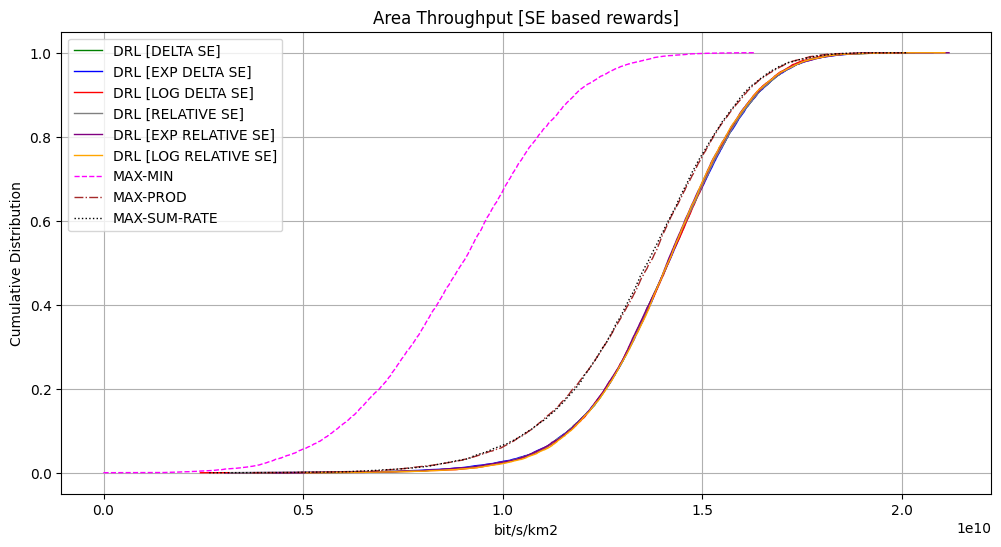

In [60]:
plot_cdf_pdf(data=ATHP_DATA_R_SE, title='Area Throughput [SE based rewards]', xlabel='bit/s/km2', operation=None, cumulative=True)

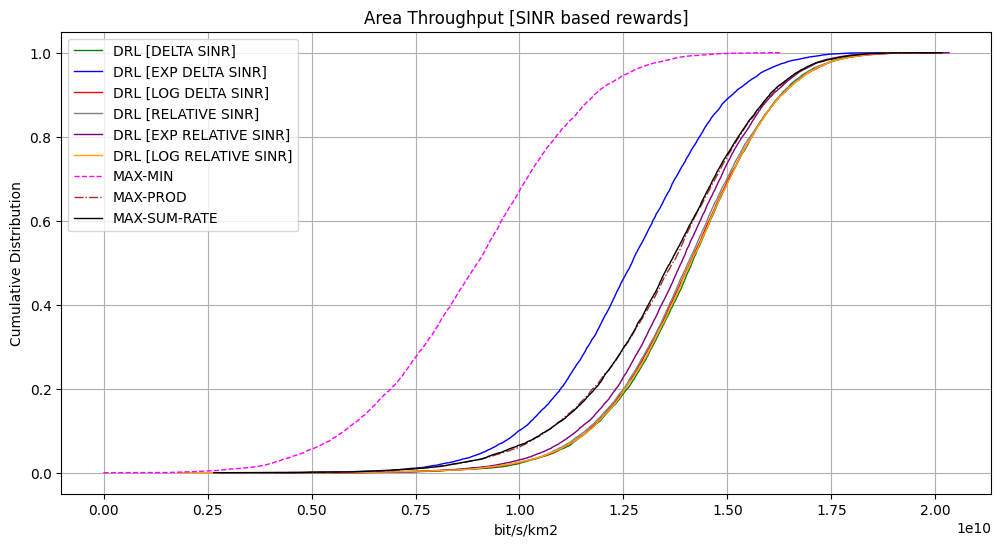

In [61]:
plot_cdf_pdf(data=ATHP_DATA_R_SINR, title='Area Throughput [SINR based rewards]', xlabel='bit/s/km2', operation=None, cumulative=True)